In [2]:
import pandas as pd

# Read data into papers
papers = pd.read_csv('/Users/Anaavu/Desktop/Anagha/UCSB/STKO/covid/2020-03-13/all_sources_metadata_2020-03-13.csv')

# Print head
papers.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


In [3]:

# Remove the columns
papers = papers.drop(columns=['sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'Microsoft Academic Paper ID', 'WHO #Covidence'], axis=1)

# Print out the first rows of papers
papers.head()

,title,abstract,publish_time,authors,journal,has_full_text
0,Angiotensin-converting enzyme 2 (ACE2) as a SA...,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,True
1,Comparative genetic analysis of the novel coro...,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,True
2,Incubation Period and Other Epidemiological Ch...,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,True
3,Characteristics of and Public Health Responses...,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,True
4,Imaging changes in severe COVID-19 pneumonia,NaN,2020,"Zhang, Wei",Intensive Care Med,False


In [4]:
papers['abstract'].isna().sum()

2947

In [5]:
papers.shape[0]

29500

In [6]:
papers2 = papers[papers['abstract'].notna()]

papers2.shape[0]


26553

In [7]:
papers2.head()

,title,abstract,publish_time,authors,journal,has_full_text
2,Incubation Period and Other Epidemiological Ch...,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,True
3,Characteristics of and Public Health Responses...,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,True
5,An updated estimation of the risk of transmiss...,The basic reproduction number of an infectious...,2020,"Tang, Biao; Bragazzi, Nicola Luigi; Li, Qian; ...",Infectious Disease Modelling,True
6,Real-time forecasts of the 2019-nCoV epidemic ...,The initial cluster of severe pneumonia cases ...,2020,"Roosa, K.; Lee, Y.; Luo, R.; Kirpich, A.; Roth...",Infectious Disease Modelling,True
8,COVID-19 outbreak on the Diamond Princess crui...,Cruise ships carry a large number of people in...,2020,"Rocklöv, J.; Sjödin, H.; Wilder-Smith, A.",Journal of Travel Medicine,True


In [7]:

# Load the regular expression library
import re

# Remove punctuation
papers2['paper_abstract_processed'] = papers2['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers2['paper_abstract_processed'] = papers2['paper_abstract_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers2['paper_abstract_processed'].head()


/Users/Anaavu/miniconda3/envs/experiments/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Anaavu/miniconda3/envs/experiments/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    the geographic spread of 2019 novel coronaviru...
3    in december 2019 cases of unidentified pneumon...
5    the basic reproduction number of an infectious...
6    the initial cluster of severe pneumonia cases ...
8    cruise ships carry a large number of people in...
Name: paper_abstract_processed, dtype: object

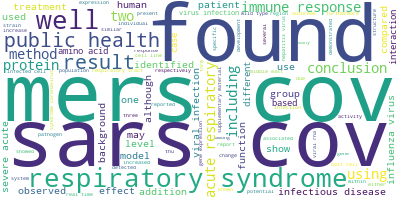

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers2['paper_abstract_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

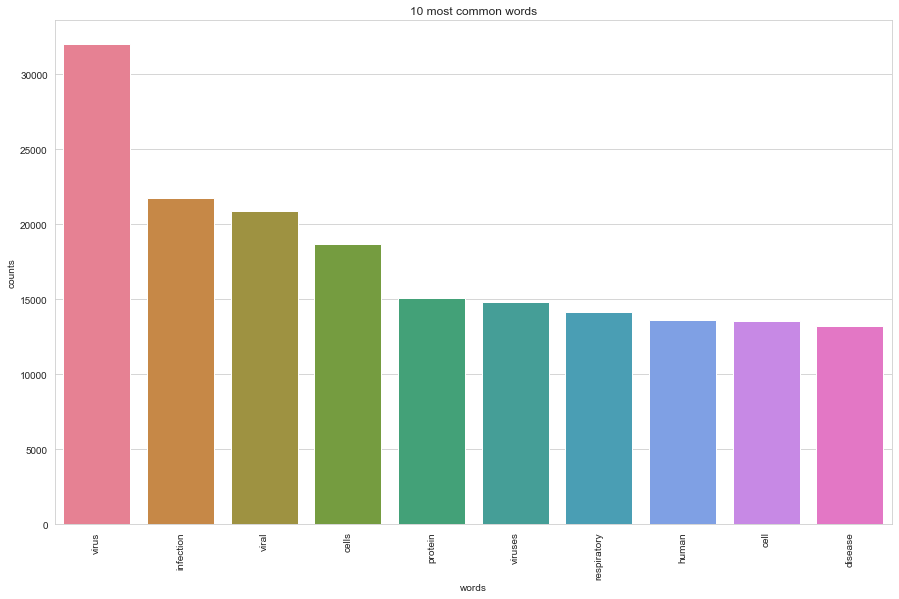

In [9]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers2['paper_abstract_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
health disease data public transmission diseases based infectious new outbreak

Topic #1:
cells cell infection virus mice immune ifn protein viral expression

Topic #2:
rna protein virus viral proteins replication host cells viruses gene

Topic #3:
patients respiratory infection study influenza results clinical children cases associated

Topic #4:
virus cov viruses respiratory sars human mers viral coronavirus infection


In [13]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

/Users/Anaavu/miniconda3/envs/experiments/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: write() argument must be str, not bytes

In [12]:
LDAvis_prepared

NameError: name 'LDAvis_prepared' is not defined

In [14]:
!pip list

Package            Version    
------------------ -----------
affine             2.3.0      
appnope            0.1.0      
arcgis             1.6.0      
arrow              0.15.5     
asn1crypto         0.24.0     
attrs              19.1.0     
backcall           0.1.0      
beautifulsoup4     4.8.0      
bibtexparser       1.1.0      
bleach             3.1.0      
certifi            2019.11.28 
cffi               1.12.3     
chardet            3.0.4      
Click              7.0        
click-plugins      1.1.1      
cligj              0.5.0      
cloudpickle        1.3.0      
cryptography       2.7        
cycler             0.10.0     
cytoolz            0.10.1     
dask               2.11.0     
decorator          4.4.0      
defusedxml         0.6.0      
earthpy            0.8.0      
entrypoints        0.3        
Fiona              1.8.4      
funcy              1.14       
future             0.18.2     
GDAL               2.3.3      
geopandas          0.6.1      
html5lib